In [14]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

---------------
## Aggregation and Grouping - Day8 HW


### Get the data

Import the data that you find here:

(Video Game Sales)[https://www.kaggle.com/datasets/gregorut/videogamesales]

Start you assignment with a discussion of the data. Is there a license, how was it generated, what are the variables and units? Then do an analysis using the grouping functions we learned in class. Here are some ideas, but you are welcome to go off script.

1. Cross-tabulate the number of games across platforms and genres. Sort this to see which platforms have the most overall games. Then make a dataframe that contains the cross-tabulated results for just four Platforms that have the most overall games.
2. Focusing on the columns that contain sales data for EU,NA, and JP, create a table that shows the mean sales for of the the top for platforms. Make a plot of this data. (bar plot)
3. Again focusing on the columns that contain sales data, create a table that shows the mean sales for each genre. Make a plot of this data.
4. Create a table that shows the mean and max sales for each year and for each sales region (NA,EU,JP). From this data make a scatter or line plot that shows how the max sales data changed over the years.

Here are some examples of my ouputs

- images/CountsTop5.png
- images/GenreAverageSales.png
- images/MaxSalesperYear.png
- images/PlatformAverageSales.png

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

# Discussion of the Data 

This notbook uses data from the Kaggle Video Game Sales data set: 

https://www.kaggle.com/datasets/gregorut/videogamesales

This data was accessed on 10/1/2025

Dataset was created and curated by Gregory Smith that is used to analyze sales data from more than 16,500 games. There is not any known license on this data set.

There are 16598 rows in the data set and 11 columns.

In [15]:
# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2


In [17]:
os.listdir(path)

['vgsales.csv']

In [20]:
file = '/Users/sethchairez/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2/vgsales.csv'
df = pd.read_csv(file)
display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [219]:
df.shape

(16598, 11)

# 1. Cross-tabulate the number of games across platforms and genres. Sort this to see which platforms have the most overall games. Then make a dataframe that contains the cross-tabulated results for just four Platforms that have the most overall games.


In [119]:
cdata = pd.crosstab([df["Rank"], df["Name"]], df["Platform"])
sorted = cdata.sum().sort_values(ascending = False)
table = sorted.reset_index()
table

,Platform,0
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822


In [26]:
sorted.head(4).index

Index(['DS', 'PS2', 'PS3', 'Wii'], dtype='object', name='Platform')

In [101]:
mask = cdata.sum() >= 1325
new_filter = cdata.sum()[mask]
new_filter.reset_index()

,Platform,0
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325


- This code cross tabulates the original data frame by the Genre, name, and platform columns within the data. The sorted variable then takes the sum of the cross tabulated data frame and puts it in descending order. This is a simple way for us to find the top 4 platforms with the higheset number of games we use across selected columns with the .head command. The final step is putting this data into a table frame. This is done by creating a mask of the summed data. The summed data must be greater than or equal to 1325. The final results of the table display that DS has the most games at 2163 games, PS2 as 2161 games, PS3 at 1329 games, and the Wii at 1325 games. 

# 2. Focusing on the col|umns that contain sales data for EU,NA, and JP, create a table that shows the mean sales for of the the top for platforms. Make a plot of this data. (bar plot)

In [30]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [32]:
grouped_columns = df.groupby('Platform')[['NA_Sales', 'EU_Sales','JP_Sales']].mean().sort_values(by = ['NA_Sales', 'EU_Sales','JP_Sales'], ascending = False)
grouped_columns.head(4).reset_index
grouped_columns

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
NES,1.285102,0.215816,1.006633
GB,1.166531,0.487959,0.868571
GEN,0.713704,0.204444,0.098889
2600,0.681203,0.041128,0.000000
X360,0.475138,0.221802,0.009826
N64,0.435799,0.128715,0.107273
XOne,0.390563,0.214319,0.001596
Wii,0.383177,0.202551,0.052340
PS3,0.295154,0.258623,0.060188


In [38]:
the_four = grouped_columns.head(4).reset_index()
the_four

,Platform,NA_Sales,EU_Sales,JP_Sales
0,NES,1.285102,0.215816,1.006633
1,GB,1.166531,0.487959,0.868571
2,GEN,0.713704,0.204444,0.098889
3,2600,0.681203,0.041128,0.000000


In [40]:
the_four.index = ['NES','GB','GEN','2600']

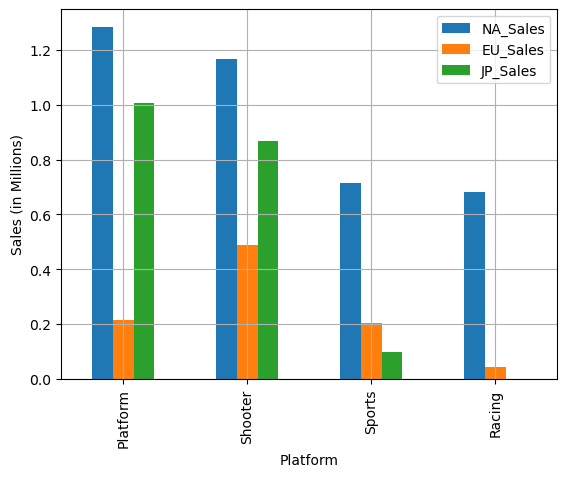

In [161]:
the_four.plot.bar()
plt.xlabel('Platform')
plt.ylabel('Sales (in Millions)')
plt.grid()

- This bar plot communicates a number of different things across the various platforms and sales in different regions. We can see that the NES has the most sales overall in North America. The Gameboy has the most overall sales in Europe. Japan holds the most amount of sales for the NES. In addition to these observations, we can see that the 2600 has the lowest ranking of all 3 sales. It is near .65 in North American sales and less than .1 in European sales. It is also the only platform without Japanese sales. On the opposite side, The NES has the most North American sales along with Japanese sales but its European sales are ranked equal to that of generational consoles.

# 3. Again focusing on the columns that contain sales data, create a table that shows the mean sales for each genre. Make a plot of this data.

In [44]:
grouped_columns = df.groupby('Genre')[['NA_Sales', 'EU_Sales','JP_Sales']].mean().sort_values(by = ['NA_Sales', 'EU_Sales','JP_Sales'], ascending = False)
grouped_columns

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Platform,0.504571,0.227573,0.147596
Shooter,0.444733,0.239137,0.029221
Sports,0.291283,0.160635,0.057702
Racing,0.287766,0.190865,0.045388
Action,0.264726,0.158323,0.048236
Fighting,0.263667,0.119481,0.103007
Misc,0.235906,0.124198,0.061967
Role-Playing,0.219946,0.126384,0.236767
Puzzle,0.212680,0.087251,0.098471


In [170]:
new_table = grouped_columns.head(4).reset_index()
new_table

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Platform,0.504571,0.227573,0.147596
1,Shooter,0.444733,0.239137,0.029221
2,Sports,0.291283,0.160635,0.057702
3,Racing,0.287766,0.190865,0.045388


In [172]:
new_table.index = ['Platform','Shooter','Sports','Racing']

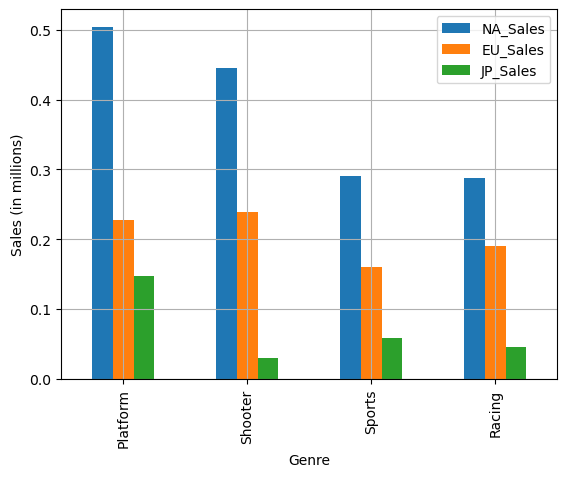

In [174]:
new_table.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.grid()
plt.show()

- This bar plot is showing us the average number of sales per video game genre. As displayed, platform video games (such as Mario, Mega Man, Donkey Kong, etc...) have the most number of sales across the North American regions. Its European sales are in close ranking to the shooter genre. Other observations that can be collected from the data are that sales for Sports and racing in the North American region are matched. The shooter region has the lowest number of Japense sales along with sports in Europe. Overall we can say that Platform video games are most common in North America. 

# 4. Create a table that shows the mean and max sales for each year and for each sales region (NA,EU,JP). From this data make a scatter or line plot that shows how the max sales data changed over the years.


In [50]:
df['Year']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [137]:
functions = ['max']
mask = df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales']].agg(functions).sort_index()
mask

,NA_Sales,EU_Sales,JP_Sales
,max,max,max
Year,,,
1980.0,4.00,0.26,0.00
1981.0,4.21,0.24,0.00
1982.0,7.28,0.45,0.00
1983.0,1.22,0.12,2.35
1984.0,26.93,0.63,2.46
1985.0,29.08,3.58,6.81
1986.0,3.74,0.93,2.65
1987.0,2.19,0.50,2.41


Text(0, 0.5, 'Sales (in millions)')

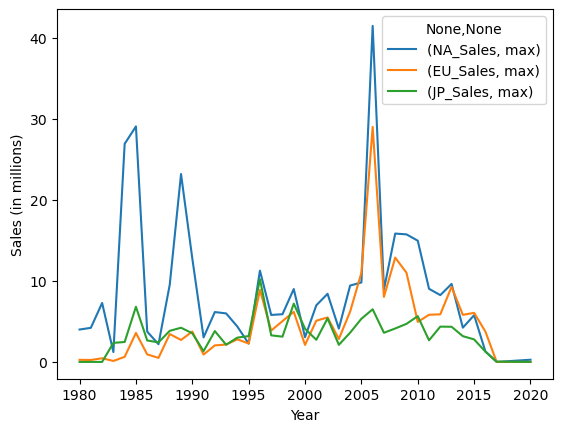

In [176]:
mask.plot()
plt.ylabel('Sales (in millions)')

- This graph displays all of the maximum number of sales across each of the listed region sales. Based off of initial glance, North American sales have the most extreme spikes. In 1984, sales appeared to drop down but drastically spike in 1985 close to 30 million sales. This was during the time of the creation of Nintendo's first entertainment system along with the infamous game Mario Brothers. After this period, sales drastically dropped again due to prices rising in the economy and individuals inability to meet the price quota for the NES. In 1990 sales then spiked again but only to about 25 million. Nintendo release of the SNES(super nintendo entertainment system), Gameboy and the nintendo 64 are responsible for this. Although these were all products that would seem to generate revenue for Nintendo, individuals were unable to meet the prices that they were asking for their consoles. Our next big spike for North American Sales does not occur until 2005 where sales go beyond 40 million. This marks the release of Nintendo's most well known product, The DS(digital system). Because this was something that no other company had offered to consumers, Nintendo broke the industry. Prices then drop near 2007 and start to slowly rise in 2010. This is a demonstration of Nintendo's release of a console and its release of another 'sister' console that does not economically do well.

- Regarding Japan's sales, there appears to be no major spikes in the data. We see the graphs overall peak near 1995 may suggest the release of a new game that sold particularly well in Japan.

- European sales have the same spike near 1995 however prices also drastically increase near 2005. Sales peak for Europe at around 25 million. This was mosy likely due to Nintendo's release of the DS. This takes a similar path like North American sales after the peak in which it drops. Near 2007 sales rise to around 11 million for overall sales and do not summit again.

- Prices not summiting again for Nintendo may suggest that Nintendo lacks innovation to make another product that is record breaking. Other industires are analyzing the mistakes of Nintendo's products and creating bigger and better products that profit for more money. 